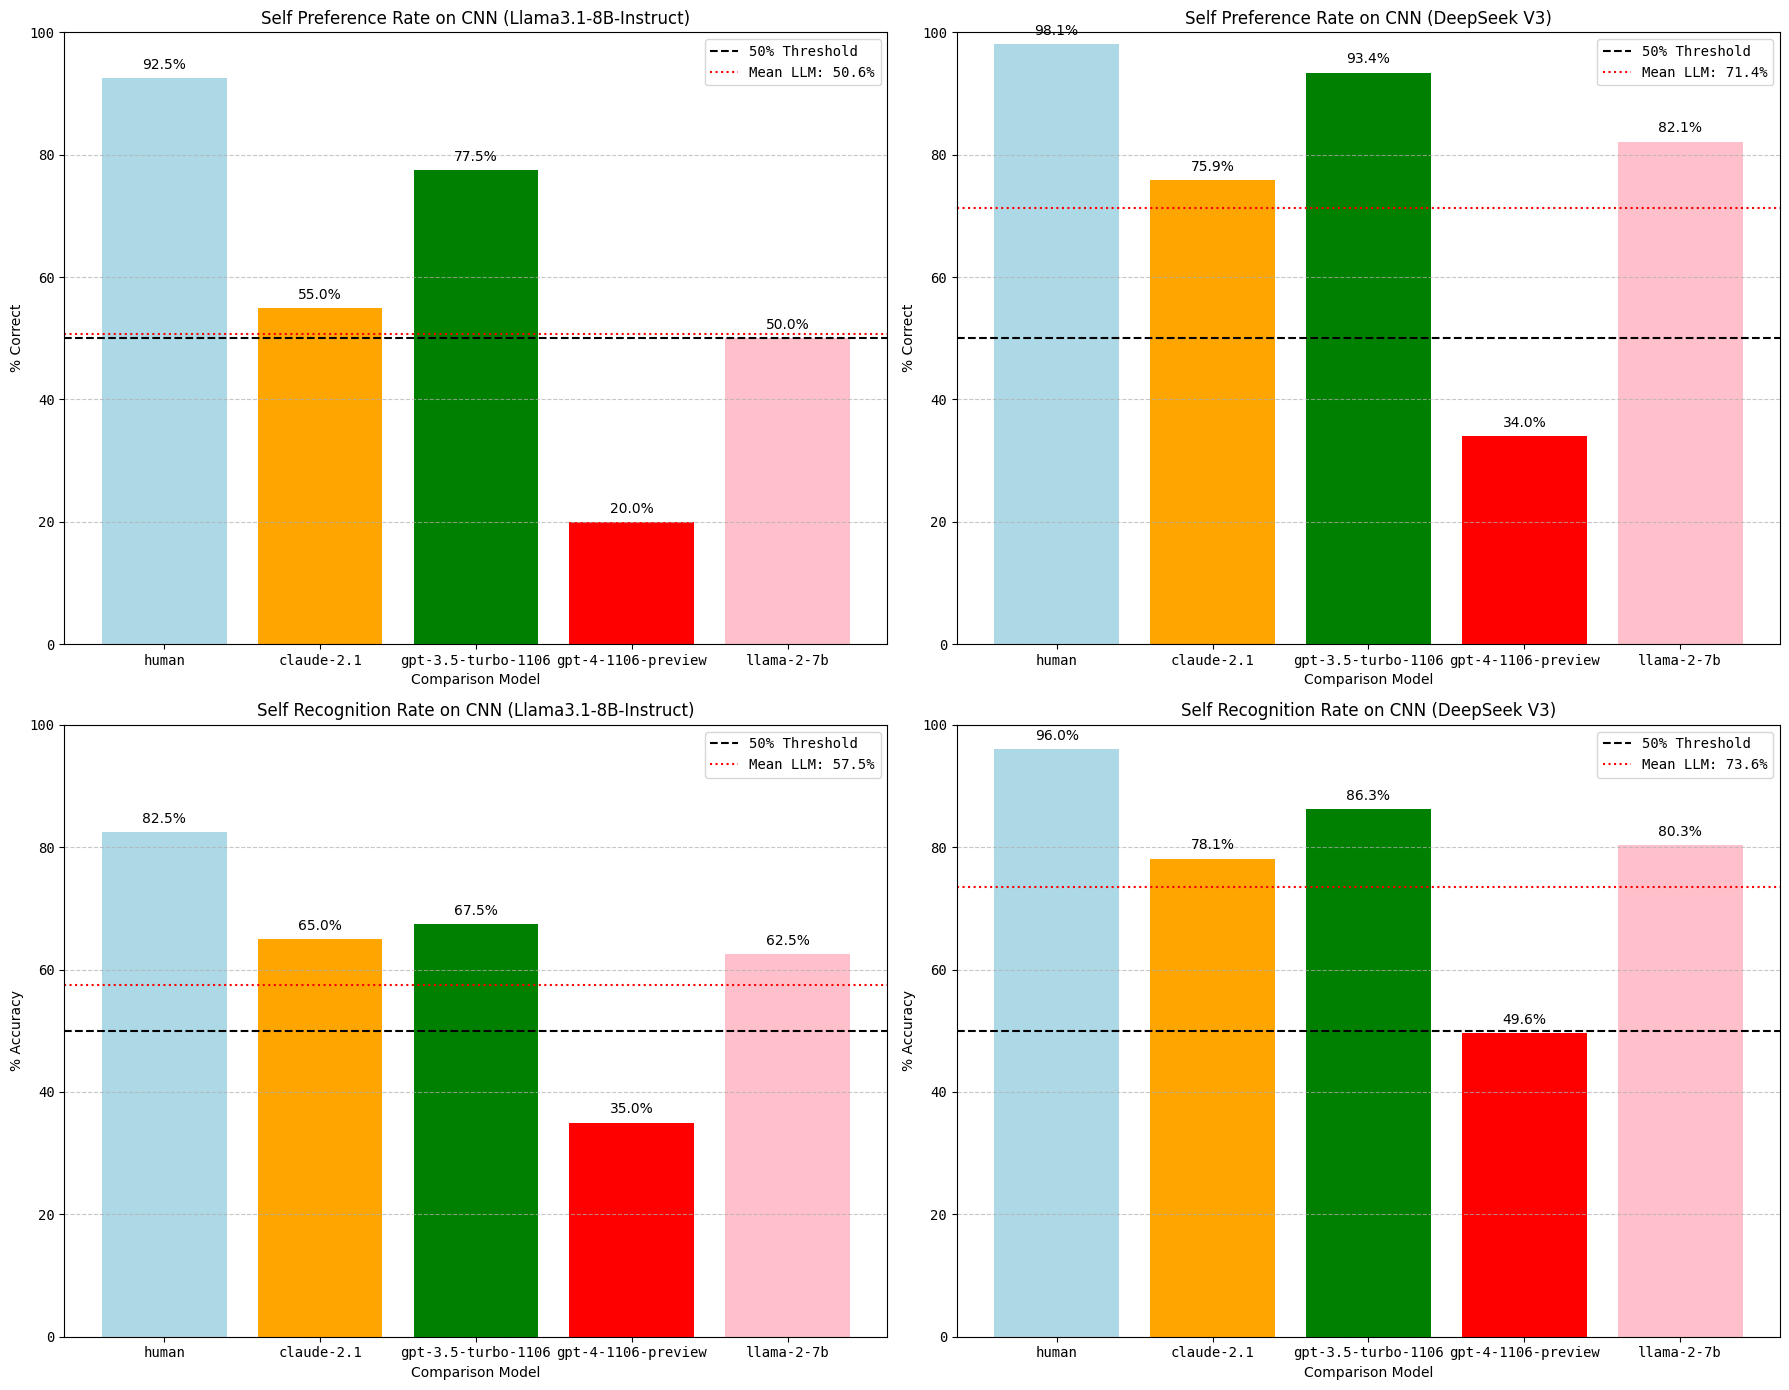

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.family'] = 'monospace'

full_names = {
    "llama": "llama-2-7b",
    "gpt4": "gpt-4-1106-preview",
    "gpt35": "gpt-3.5-turbo-1106",
    "claude": "claude-2.1",
    "human": "human",
    "llama3.1-8b-instruct": "LLAMA3.1-8B-Instruct", 
    "deepseek": "DeepSeek V3" 
}
colors = {
    "llama": "pink",
    "human": "lightblue",
    "gpt4": "red",
    "gpt35": "green",
    "claude": "orange",
    "llama3.1-8b-instruct": "#e377c2", 
    "deepseek": "#8c564b" 
}

def plot_model_performance(ax, df_path, title, value_column, y_label):
    try:
        df = pd.read_csv(df_path)
    except FileNotFoundError:
        ax.set_title(f"{title} (Data Not Found)", fontname='DejaVu Sans')
        ax.set_ylim(0, 100)
        ax.set_ylabel(y_label, fontname='DejaVu Sans')
        ax.set_xlabel('Comparison Model', fontname='DejaVu Sans')
        return

    df[f'{value_column}_percent'] = df[value_column] * 100
    df.columns = ['Comparison Model', value_column, f'{value_column}_percent']

    llm_models_df = df[df['Comparison Model'] != 'human']
    mean_llm_rate = llm_models_df[f'{value_column}_percent'].mean() if not llm_models_df.empty else None

    df['bar_colors'] = df['Comparison Model'].map(colors)
    df['display_name'] = df['Comparison Model'].map(full_names)

    df['bar_colors'] = df['bar_colors'].fillna('gray')
    df['display_name'] = df['display_name'].fillna(df['Comparison Model'])

    bars = ax.bar(df['display_name'], df[f'{value_column}_percent'], color=df['bar_colors'])

    ax.axhline(y=50, color='black', linestyle='--', linewidth=1.5, label='50% Threshold')

    if mean_llm_rate is not None:
        ax.axhline(y=mean_llm_rate, color='red', linestyle=':', linewidth=1.5, label=f'Mean LLM: {mean_llm_rate:.1f}%')

    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%',
                ha='center', va='bottom', fontname='DejaVu Sans')

    ax.set_ylim(0, 100)
    ax.set_ylabel(y_label, fontname='DejaVu Sans')
    ax.set_xlabel('Comparison Model', fontname='DejaVu Sans')
    ax.set_title(title, fontname='DejaVu Sans')
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.legend()

llama_preference_file_path = "individual_setting/score_results/cnn/llama3.1-8b-instruct_comparison_results_self_prefer_rate_simple.csv"
deepseek_preference_file_path = "individual_setting/score_results/cnn/deepseek-v3-0324_comparison_results_self_prefer_rate_simple.csv" # Placeholder: Update with your actual DeepSeek preference file path
llama_detection_file_path = "individual_setting/score_results/cnn/llama3.1-8b-instruct_comparison_results_detect_accuracy_simple.csv" # Placeholder: Update for detection data
deepseek_detection_file_path = "individual_setting/score_results/cnn/deepseek-v3-0324_comparison_results_detect_accuracy_simple.csv" # Placeholder: Update for detection data

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

plot_model_performance(axes[0, 0], llama_preference_file_path,
                       'Self Preference Rate on CNN (Llama3.1-8B-Instruct)',
                       'self_preference_rate', '% Correct')

plot_model_performance(axes[0, 1], deepseek_preference_file_path,
                       'Self Preference Rate on CNN (DeepSeek V3)',
                       'self_preference_rate', '% Correct')

plot_model_performance(axes[1, 0], llama_detection_file_path,
                       'Self Recognition Rate on CNN (Llama3.1-8B-Instruct)',
                       'detection_accuracy', '% Accuracy')

plot_model_performance(axes[1, 1], deepseek_detection_file_path,
                       'Self Recognition Rate on CNN (DeepSeek V3)',
                       'detection_accuracy', '% Accuracy')

plt.tight_layout()
plt.show()